<a href="https://colab.research.google.com/github/Non-NeutralZero/datascience-dev-helpers/blob/master/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   On each node, a decision tree asks a question and answers it with yes/no to classify observations under that node.
*   The question could be based on a specific True/False *(is obs.feature = something)* question or could be based on numeric data *(is obs.feature > 10)*
![Decision tree example](https://upload.wikimedia.org/wikipedia/commons/f/ff/Decision_tree_model.png)
*   The classification can be categorical or numerical
*   The first node is called the **Root node**, the nodes in the middle are called **internal nodes**, and the results are called **leaf nodes**





In [44]:
# source https://scikit-learn.org/stable/modules/tree.html#classification
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd

iris = load_iris()
X, y = load_iris(return_X_y=True)
X_df = pd.DataFrame(X, columns=iris.feature_names)
X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Decision tree based on sepal length (cm)


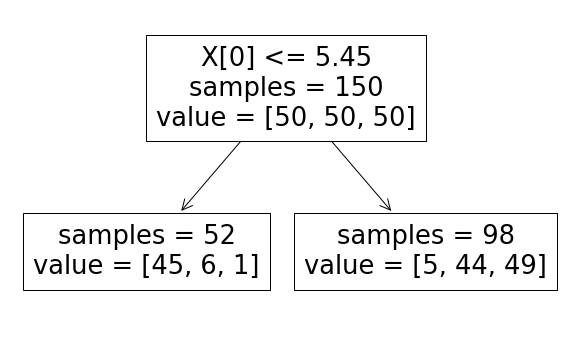

Decision tree based on sepal width (cm)


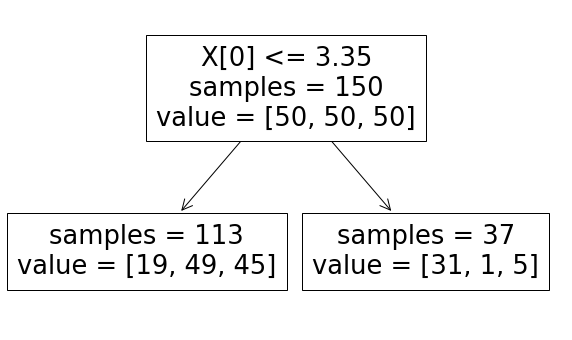

Decision tree based on petal length (cm)


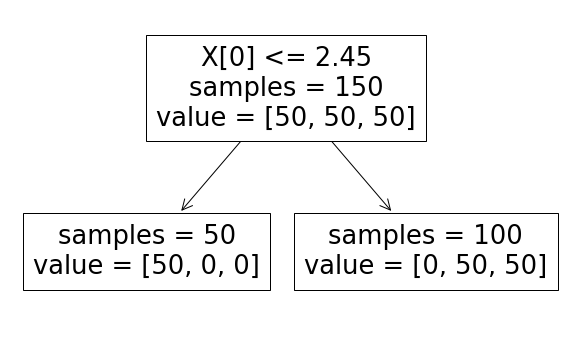

Decision tree based on petal width (cm)


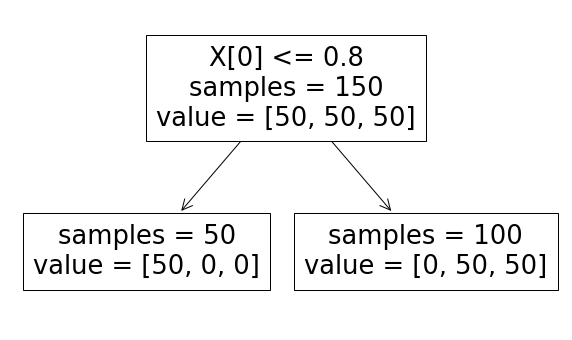

In [45]:
# Imagine we need to pick a root node ourselves: we'll need to see how each feature performs on the split
## Fitting our tree on the train data
import matplotlib.pyplot as plt

for feature in iris.feature_names:
  plt.figure(figsize=(10,6))
  clf = tree.DecisionTreeClassifier(max_depth=1)
  clf = clf.fit(X_df.loc[:,feature].values.reshape(-1,1), y)
  print("Decision tree based on {0}".format(feature))
  tree.plot_tree(clf, filled=False, impurity=False) 
  plt.show()

*  When the leaves don't contain 100% of our data, we consider them "impure"
*   Now, to get our Root node, we'll need to measure this "impurity" concept and choose the "best" feature as a root
*   The most popular way to measure impurity is Gini (*more on it here* [interpretation and intuitive explanation of Gini impurity ](https://www.quora.com/What-is-the-interpretation-and-intuitive-explanation-of-Gini-impurity-in-decision-trees) )
> ![Gini formula](https://miro.medium.com/max/664/0*asbVp_8lwEsbfpOv.png)
*   So now, based on this impurity measure we can evaluate what the best split is (all we'll to do is calculate the weighted average for the leaf nodes of each split) 

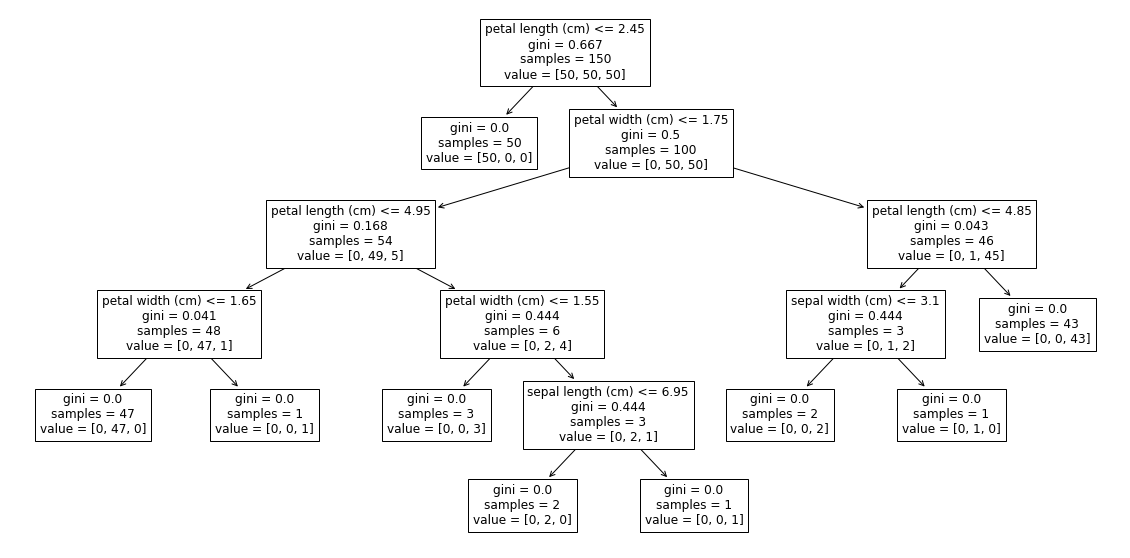

In [46]:
# This process is already implemented in the sklearn library. 
## So let's look at what it yields!
clf = tree.DecisionTreeClassifier()
plt.figure(figsize=(20,10))
tree.plot_tree(clf.fit(X, y), impurity=True, feature_names=iris.feature_names) 
plt.show()

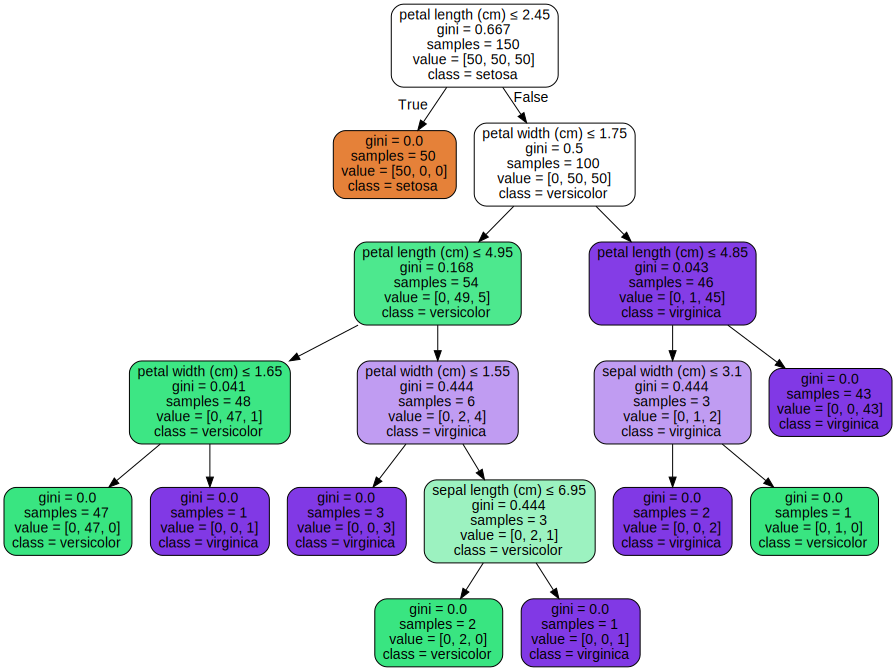

In [47]:
## Plotting the tree (alternative - useful when tree is big!)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# see also: plot Decision surface of a decision tree using paired features
# https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html